## Problem Statement : 

### Text classification 

    weather a email is a spam or ham(not-spam)
    
    P[ y = spam | words in email ]    &   P[ y = ham | words in email ]
    P[ y = 1 | w1,w2,w3,...,wk ]          P[ y = 0 | w1,w2,w3,...,wk ] 
    
    
    Data given is not always in a structures format
    (especially in NLP problems.)
    
    Challenges in such problems : 
    Emails are of different length. (not given in tabular format)
    
    data pre-processing is required.
    
    



### Data : 

In [1]:
df = pd.read_csv("spam_clean.csv")

<IPython.core.display.Javascript object>

In [2]:
df

,type,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [3]:
df["message"][10]

"I'm gonna be home soon and i don't want to talk about this stuff anymore tonight, k? I've cried enough today."

In [4]:
df["message"][7]

"As per your request 'Melle Melle (Oru Minnaminunginte Nurungu Vettam)' has been set as your callertune for all Callers. Press *9 to copy your friends Callertune"

In [5]:
df["message"][25]

"Just forced myself to eat a slice. I'm really not hungry tho. This sucks. Mark is getting worried. He knows I'm sick when I turn down pizza. Lol"

In [6]:
df['type'].value_counts()

ham     4825
spam     747
Name: type, dtype: int64

## Data Preprocessing : 

    reduce unique words by converting all the letters into lower case. 
    

## Tockenization : 
    Tokenization is used in natural language processing to split paragraphs and sentences into smaller units that can be more easily assigned meaning. 


    The first step of the NLP process is gathering the data (a sentence) and breaking it into understandable parts (words). Here’s an example of a string of data:  


    “What restaurants are nearby?“


    In order for this sentence to be understood by a machine, tokenization is performed on the string to break it into individual parts. With tokenization, we’d get something like this:  


    ‘what’ ‘restaurants’ ‘are’ ‘nearby’  

https://www.tokenex.com/blog/ab-what-is-nlp-natural-language-processing-tokenization/

    remove punctiations.
         . @ | ! / \ , = etc. 
    stopword removal .

In [7]:
# Natural Language tool kit : 

In [8]:
from nltk.tokenize import word_tokenize
import re
from nltk.corpus import stopwords 


In [9]:
# nltk.download('punkt')

In [10]:
sw = set(stopwords.words("english"))
# there are the words who have no sentiments 
sw

{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 'her',
 'here',
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 'i',
 'if',
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'our',
 'ours',
 'ourselves',
 'out',
 'over',
 'own',
 'r

In [11]:
def get_clean_email(email):
    email = email.lower()
    import re
    pattern = "[^a-z ]+"
    repl = ""
    string = email
    eml = re.sub(pattern, repl, string).strip()
    eml = word_tokenize(eml)           # convert sentense into words list 
    
    eml = [w for w in eml if w not in sw]
    return " ".join(eml)

In [12]:
email = "Hi !! ,.. my name IS SunnY :) -28-10-1991"
email = get_clean_email(email)
email

'hi name sunny'

In [13]:
df["cleaned_message"]  = df["message"].apply(get_clean_email)

In [14]:
df["type"] = df["type"].astype("category").cat.codes

In [15]:
df

,type,message,cleaned_message
0,0,"Go until jurong point, crazy.. Available only ...",go jurong point crazy available bugis n great ...
1,0,Ok lar... Joking wif u oni...,ok lar joking wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,free entry wkly comp win fa cup final tkts st ...
3,0,U dun say so early hor... U c already then say...,u dun say early hor u c already say
4,0,"Nah I don't think he goes to usf, he lives aro...",nah dont think goes usf lives around though
...,...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...,nd time tried contact u u pound prize claim ea...
5568,0,Will Ì_ b going to esplanade fr home?,b going esplanade fr home
5569,0,"Pity, * was in mood for that. So...any other s...",pity mood soany suggestions
5570,0,The guy did some bitching but I acted like i'd...,guy bitching acted like id interested buying s...


In [16]:
df["message"][15]

'XXXMobileMovieClub: To use your credit, click the WAP link in the next txt message or click here>> http://wap. xxxmobilemovieclub.com?n=QJKGIGHJJGCBL'

In [17]:
df["cleaned_message"][15]

'xxxmobilemovieclub use credit click wap link next txt message click httpwap xxxmobilemovieclubcomnqjkgighjjgcbl'

## train test split 

In [18]:
df["type"].value_counts(normalize=True)

0    0.865937
1    0.134063
Name: type, dtype: float64

In [19]:
df["type"].value_counts(normalize=False) # Imbalanced 

0    4825
1     747
Name: type, dtype: int64

In [20]:
from sklearn.model_selection import train_test_split

In [21]:
df_X_train, df_X_test, y_train, y_test = train_test_split( df["cleaned_message"],
                                                     df["type"],
                                                    test_size=0.25,
                                                    random_state=42)

In [22]:
df_X_train

4281                                               u call
585               tell u headache want use hour sick time
4545    never try alone take weight tear comes ur hear...
3034    rajipls favour pls convey birthday wishes nimy...
2758                                         time im prob
                              ...                        
3772        came hostel going sleep plz call class hrishi
5191                                 sorry ill call later
5226                prabhaim sorydarealyfrm heart im sory
5390                             nt joking seriously told
860                                        work going min
Name: cleaned_message, Length: 4179, dtype: object

In [23]:
df_X_train.shape,df_X_test.shape

((4179,), (1393,))

In [24]:
y_train.shape,y_test.shape

((4179,), (1393,))

## Bag of Words : 
    
    
    - one of the technique to convert text data to vector
        text (email) ----> vector 
        
    - Bag of words creates a vocabulary. 
    - word of all the unique words in the entire dataset .
    
    
    - wherever a word appear, mark it as 1 else 0 for all the data points
        
    
             a | an | apple | bag | dog | free | gift | many | people | price ...
    email1:    0    0     0      0      0     1    1       0         0     1
    email2:    1    0     0      1      0     0    1       0         0     0
      .
      .
      .
     
     at the end of vecterization , we get a structured data .
     a table of 
     X[n*d] (n : total data points , d: all the unique words)
     
     
     
        
     
        

# Vectorization 

## BagOfWord

In [25]:
from sklearn.feature_extraction.text import CountVectorizer

# CountVectorizer : is a BagOfWord 
# to Learn the unique vocabulary


In [26]:
vectorizer = CountVectorizer()


# CountVectorizer(
#     *,
#     input='content',
#     encoding='utf-8',
#     decode_error='strict',
#     strip_accents=None,
#     lowercase=True,
#     preprocessor=None,
#     tokenizer=None,
#     stop_words=None,
#     token_pattern='(?u)\\b\\w\\w+\\b',
#     ngram_range=(1, 1),
#     analyzer='word',
#     max_df=1.0,
#     min_df=1,
#     max_features=None,          if we set max_features = 5000
                        # it will only select most frequent 5000 words.
#     vocabulary=None,
#     binary=False,
#     dtype=<class 'numpy.int64'>,
# )


In [27]:
# Learning the unique vocabulary
vectorizer.fit(df_X_train)

CountVectorizer()

In [28]:
X_train = vectorizer.transform(df_X_train)
X_test = vectorizer.transform(df_X_test)

In [29]:
X_train

<4179x7093 sparse matrix of type '<class 'numpy.int64'>'
	with 33926 stored elements in Compressed Sparse Row format>

In [30]:
4179 * 7093 # unique words 

29641647

In [31]:
X_test

<1393x7093 sparse matrix of type '<class 'numpy.int64'>'
	with 10126 stored elements in Compressed Sparse Row format>

In [32]:
X_train.nnz
# Number of stored values, including explicit zeros.
# number of non-zeros 

33926

In [33]:
# total numbers 
33926/(4179 * 7093) # % of total words .

0.0011445382910065692

In [34]:
# if we want to see the whole vector of each data point.

In [35]:
X_train.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [36]:
X_train.toarray().shape

(4179, 7093)

In [37]:
X_test.shape

(1393, 7093)

In [38]:
X_train.shape

(4179, 7093)

## Naive Bayes : 
https://en.wikipedia.org/wiki/Naive_Bayes_classifier

- naive Bayes classifiers are a family of simple "probabilistic classifiers" based on applying Bayes' theorem with strong (naive) independence assumptions between the features (see Bayes classifier).

- They are among the simplest Bayesian network models, but coupled with kernel density estimation, they can achieve high accuracy levels.

- Naive Bayes classifiers are highly scalable, requiring a number of parameters linear in the number of variables (features/predictors) in a learning problem.
- Maximum-likelihood training can be done by evaluating a closed-form expression, which takes linear time, rather than by expensive iterative approximation as used for many other types of classifiers.


- In the statistics literature, naive Bayes models are known under a variety of names, including simple Bayes and independence Bayes.
- All these names reference the use of Bayes' theorem in the classifier's decision rule, but naive Bayes is not (necessarily) a Bayesian method.

### at runtime what we need to find is :  
     
    argmax ( P[y=1|text] and P[y=0|text] )
    
    P[y=1|text]   !=   (1 - P[y=1|text])   (are not same)
    
    
    
    
    
    


---
### Bayes theorem: 
---
    
              P[B|A] * P[A]
    P[A|B] =  --------------
                   P[B]

---
                   
               P[X|y=1] P[y=1]       
    P[y=1|X] = -----------------
                    P[X]
                    
                
               P[X|y=0] P[y=0]       
    P[y=0|X] = -----------------
                    P[X]
                    
---                                 
          
    Posterior      likelyhood * prior
    Proability  =  --------------------
                  marginal probability
                  
--- 

    if P[y=1|x] = 0.85  and P[y=0|x] = 0.35 ,
    then y^ = 1
    since the probability of data belongs to class 1 is higher. 
    
                  

--- 
--- 

    # For Multiclass : 
    lets say : classes are : 
            SPAM , SOCIAL , PROMOTION and PRIMARY
            
    argmax (P[y = SPAM       |X],
            P[y = SOCIAL     |X],
            P[y = PROMOTION  |X],
            P[y = PRIMARY    |X])
            
       calulate 4 posterior probabilities , and whichever is maximum
       assign that class as y^

---

    
    

                        P[X|y=1] P[y=1]       
            P[y=1|X] = -----------------      ∝    P[X|y=1] P[y=1]
                            P[X]


                       P[X|y=0] P[y=0]       
            P[y=0|X] = -----------------      ∝    P[X|y=0] P[y=0]
                            P[X]
                            
                            
            P[y=1|X]   ∝    P[X|y=1] P[y=1]    
            P[y=0|X]   ∝    P[X|y=0] P[y=0]
            
            
                            

---

####  Prior Probability
    Most easiest thing to calculate is Prior Probability
     
     
     P[y=1] and P[y=0] from the entire dataset
     
     
                Number of train data points with y=1
     P[y=1]  =  ------------------------------------
                     total training points
         

In [39]:
y_train.value_counts(normalize= True)

0    0.866954
1    0.133046
Name: type, dtype: float64

#### Likelyhood - Conditional Probability 

           P[X|y=1]    and    P[X|y=0]
           
           P[ w1 w2 w3...wd  | y=1 ]       in howmany spam emails
                                           we are getting these exact sequence
                                           of words 
                                           
                        and                   
                           
                           
           P[ w1 w2 w3...wd  | y=0 ]       in howmany non-spam emails
                                           we are getting these exact sequence
                                           of words 
                                           
           
      since we are trying to find the exact sequence,
      it's computationally very challenging and expensive 
      
      thats why we take a NAIVE ASSUMPTION into account : 
      which is : 
      
#### Naive Assumption : 


     Lets say : 
     X-test is : "w5" , "w7" , "w10"
      array :   [00001010010000000000.......0...00..]
      
     getting exact same sequence in the training , is very very rare.
     
     so we have to take an assumption : 
             which is all the words are independent.
             for example : "Get a free subscription"
               then word "Subscription" is independent of word "free"
     But still , all the words are conditioned on class label. 
     like , P["free"|y=1] ,P["Subscription"|y=1]
     
                    
     P[ w5,w7,w10 | y=1 ] = P[w5 | y=1] * 
                            P[w7 | y=1,w5] *
                            P[w10| y=1,w5,w7]
                    rathen calculating above complex computation 
             use naive assumption 
             and find : 
             
     
     
                            
      
     

---
    P[w1 w2 ... wd | y=1] = ( P[w1|y=1]*P[w2|y=1]* ... *P[wd|y=1] )* P[y=1]
     
                                d    
                  P[X|y=1] =    π   P[wi|y=1]     * P[y=1]
                               i=1
                               
                               
---

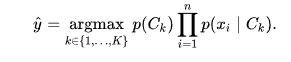

                Ck is the class , given data belongs to 
                y^ is the predicted class
                

    lets say : 
    X_test = "Lottery win 5000 USD"
     
    P[x-test | y=1] = in how many mails we see word "lottery" 
                      ---------------------------------------
                               out of all spam emails
                               
    most often , we will observe LOTTERY word in spam emails than in non-spam emails 

## Prior Probability : 


## Conditional Probability

In [40]:
# lets find the probability of word free occures in a all record. 

In [41]:
df[df['type'] == 1]['cleaned_message'].str.contains('free').sum()

199

In [42]:
len(df[df['type'] == 1])  # total spam emails 

747

In [43]:
199/747  # 26% probability will be given to word "free" if the email is spam

0.26639892904953144

In [44]:
df[df['type'] == 0]['cleaned_message'].str.contains('free').sum()

66

In [45]:
len(df[df['type'] == 0])

4825

In [46]:
66/4825 # 1% probability when free word appears in non-spam 

0.013678756476683937

In [47]:
# lets find the probability of word "love" occures in a all record. 

In [48]:
df[df['type'] == 0]['cleaned_message'].str.contains('love').sum()

217

In [49]:
217/4825

0.044974093264248706

In [50]:
df[df['type'] == 1]['cleaned_message'].str.contains('love').sum()

8

In [51]:
8/747

0.0107095046854083

In [52]:
# vocabulary_ of all the words and count
vectorizer.vocabulary_

{'call': 830,
 'tell': 6035,
 'headache': 2608,
 'want': 6654,
 'use': 6497,
 'hour': 2768,
 'sick': 5416,
 'time': 6180,
 'never': 4019,
 'try': 6343,
 'alone': 176,
 'take': 5966,
 'weight': 6723,
 'tear': 6020,
 'comes': 1150,
 'ur': 6482,
 'heart': 2617,
 'falls': 2003,
 'eyes': 1979,
 'always': 189,
 'remember': 4967,
 'stupid': 5827,
 'friend': 2250,
 'share': 5339,
 'bslvyl': 759,
 'rajipls': 4838,
 'favour': 2038,
 'pls': 4538,
 'convey': 1237,
 'birthday': 602,
 'wishes': 6813,
 'nimya': 4047,
 'today': 6216,
 'im': 2881,
 'prob': 4709,
 'hi': 2667,
 'kate': 3151,
 'lovely': 3482,
 'see': 5255,
 'tonight': 6252,
 'ill': 2877,
 'phone': 4467,
 'tomorrow': 6240,
 'got': 2448,
 'sing': 5443,
 'guy': 2530,
 'gave': 2325,
 'card': 884,
 'xxx': 6985,
 'usualiam': 6511,
 'fine': 2097,
 'happy': 2583,
 'amp': 201,
 'well': 6733,
 'nope': 4085,
 'watching': 6675,
 'tv': 6366,
 'home': 2721,
 'going': 2414,
 'bored': 678,
 'ps': 4759,
 'grown': 2503,
 'right': 5061,
 'wat': 6670,
 'tht'

### Learnable Parameters : 

    STEP 1
    priors: 
                    P[y=1] and P[y=0]
     
    STEP 2
    conditional probabilities: 
    
             each word in a dictionary
             
             {
             word1 : {"0": P[word1|y=0]  , "1": P[word1|y=1]},
             word2 : {"0": P[word2|y=0]  , "1": P[word2|y=1]},
             word3 : {"0": P[word3|y=0]  , "1": P[word3|y=1]},
             .
             .
             .
             word : {"0": P[word|y=0]  , "1": P[word|y=1]}
             }
         
    STEP 3
        posterior   ∝    Conditional    prior
       probability      probability    probability
        
        P[y=1|X]   ∝    P[X|y=1]   *  P[y=1]    
        P[y=0|X]   ∝    P[X|y=0]   *  P[y=0]

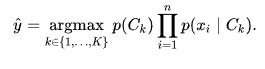

## sklearn.naive_bayes

In [53]:
from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import f1_score

In [54]:
BNB = BernoulliNB(alpha=0.001)

In [55]:
BNB.fit(X_train,y_train)

BernoulliNB(alpha=0.001)

In [56]:
y_pred = BNB.predict(X_test)

In [57]:
f1_score(y_test, y_pred),f1_score(y_train, BNB.predict(X_train))

(0.9366391184573003, 0.9945750452079565)

In [58]:
f1_score(y_train, BNB.predict(X_train))

0.9945750452079565

In [59]:
BNB.score(X_train,y_train),BNB.score(X_test,y_test)

(0.9985642498205313, 0.9834888729361091)

## Space Complexity and Time Complexity 

    

    space : 
        total number of words = d
        total number of class = c
        
        O(d*c + c) ~ ~  O(d*c)
        
     
    run-time complexity : 
            
            O(d)
        
    train time complexity: 
        
        O(ndc)   n - datapoints
        
        P[w|y= 0] : O(n+n+n+n....+d-times) * number of classes 
        =O(n*d * c)
        
        ~~O(nd)
        
    
    
        
        

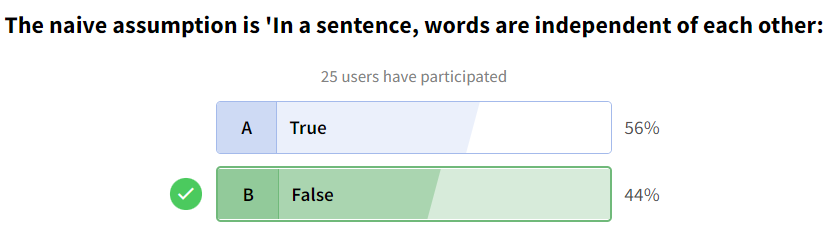


In [60]:
# assumption is words are independent , 
# but are dependents on the label.


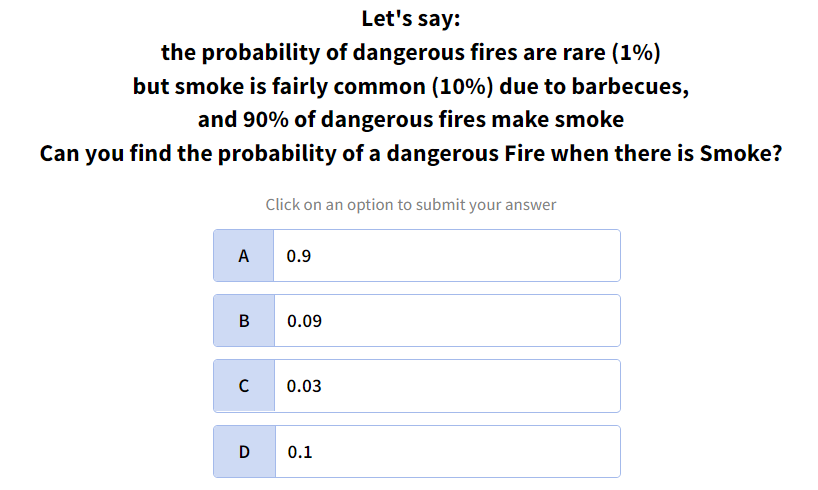

In [61]:
(0.90*0.01)/(0.10)

0.09000000000000001

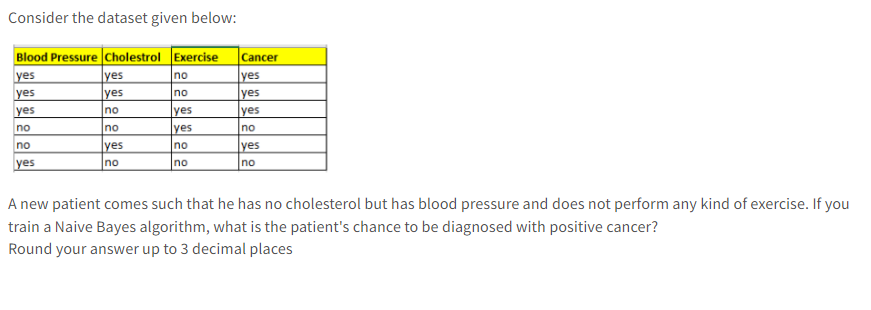

In [62]:

3/4 * 1/4 * 3/4 *  4/6

0.09375

## Laplace Smoothing :    (handles outliers that are new words in test/query data )

    at runtime :
    
    X-query : w2 w15 w25 w'
    
    w' is a new word , which is not present in current model vocabulary 
    
    w' doent belongs to {w1 , w2 , w3, ... wd}
    
    
    
    
    goal is to find P[y=1|x-query] and P[y=0|x-query]
    
                     (P[w2|y=1] * P[w15|y=1] * P[w25|y=1] * P[w'|y=1] ) * P[y=1]
                                                            ********
                                                              since w' is not present
                                                              P[w'|y=1] is 0
                                                       so , entire term P[y=1|X-query]
                                                       and P[y=0|X-query] becomes 0
                                                       
                                                       
       How can we tackle the new word :
       
       whenever we see a new word , we can ignore it . But it doent make sense. 
       
       better way is : (quick hack) 
       
       
       find P[w'|y=1] = occurances when w' is present in entire data  + alfa
                       ----------------------------------------------
                                total data points + alfa * C
                                
                                C :distinct value w' can take.
                                in Bernouli NB,  C = 2
                                
       alfa is a hyperparamet.
       
       We are assigning some weight to the new word.
       makes algorithm more customizable.
       

       
       
       
                                                
                                                     
                                                      
                                                      
                                                      
                     
                     

## Bias variance tradeoff : 

    assume alfa  = 1 ( a small value)
    
    P[w'|y=1] =   n1'* alfa
                 -----------
                  n1 + 2*alfa
             
    P[w'|y=0] =   n0'* alfa
                 -----------
                  n0 + 2*alfa
    
    
    P[w'|y=1] =   n1' * 1
                  ----------
                  n1 + 2*1
                  
              n1' = 0 , n1 = 100 
              
             
              =  1
                ----   atleast this term is not 0.   = 0.0098
                102
    
            
    P[w'|y=0] =     0 + 1            1
                 -----------  =  ----------  = 0.005
                  300 + 2*1         302
    
    
    
    
    case : when alfa = 0   (not applying Laplace smoothing)
            lets say for word "free"
          n1 = 100
          n1' = 10  ("Free")
          
          P[Free|y=1] = n1'
                      /n1
                    = 10 + 0 /
                      100+ 0 
                    = 0.10
                    
     case when alfa = 1
           P[Free|y=1] = n1'
                      /n1
                    = 10 + 1 /
                      100+ 2 
                    = 11/102 ~~ 0.1
                 even if we increase alfa value , still it will be close to 0.1
                 
      case when alfa is very large
       alfa  = 10000
        
           P[Free|y=1] = 10 * 10000/
                      100 + 20000
                     ~~ 0.498
                     
           P[Free|y=0] = 5 * 10000/
                  150 + 20000
                 ~~ 0.5
                 
            so if we increase alfa to a very large number , 
            all the words probability will become close to 0.5
            which will make no sense and word become useless. 
            makes model underfit. 

                all the conditional probabilities will be close to 0.5
        
        P[y=1|x] = P[wi|y=1]*P[y=1]  ~~ P[y=1] 
        P[y=0|x] = P[wi|y=0]*P[y=0]  ~~ P[y=0]
         and we will only be relying on P[clsses]  (only comparison left to do)
         
         
        
        alfa increases : Underfit increases    [ applying too much smoothing]
        alfa small value : Overfit increases   [not doing laplace smoothing ]
        
        
        
        
         
                   

### Imbalance impact : 

        P[y=1] = 0.30   30% spam emails
        P[y=0] = 0.70
        
       
        
        
       impact : 
       lets say X-query : "Free lottery win"
       
       P[wi|y=1] = 0.2
       P[wi|y=0] = 0.1
       
       P[y=1|X-query] = 0.2*0.3 = 0.06
       P[y=0|X-query] = 0.1*0.7 = 0.07   hence will conclude the x-query point belongs to non-spam
                                                                       WRONG CONCLUSION 
                                                                       
       please make , prior probability equal ~~= 0.5
       
       so we can take LIKELIHOOD probability only into account.
       P[y=1|X-query] = 0.2 *0.5 = 0.1 
       P[y=0|X-query]= 0.1 *0.5 = 0.05    and now we can see , X-query belongs to y= spam
                                                                    CORRECT decision
                                                                    
                              DO NOT CONSIDER PRIOR PROBABILITY 
                              TAKE LIKELIHOOD  INTO CONSIDERATION 
       
                   

#### more Vectorization techniques  [in deep learning - NLP ]
1. Bag of Words
2. IDF
3. Word2Vec
4. GloVe
5. FastText

### Big issue with current algorithm : 

## Undeflow problem : 



    P[y=1|X] =  product(P[wi|y=1])* P[y=1]
    P[y=0|X] =  product(P[wi|y=0])* P[y=0]
      
      are very very very very small number. ~~ 0.00000000...00016541
      
      
     solution is to take a log transform 
     
     log(P[y=1|X])  = ( log(P[w1|y=1]) + log(P[w2|y=1]) +  ... + log(P[wd|y=1]) ) + log(P[y=1])  
     log(P[y=0|X])  = ( log(P[w1|y=0]) + log(P[w2|y=0]) +  ... + log(P[wd|y=0]) ) + log(P[y=0])
     
     
 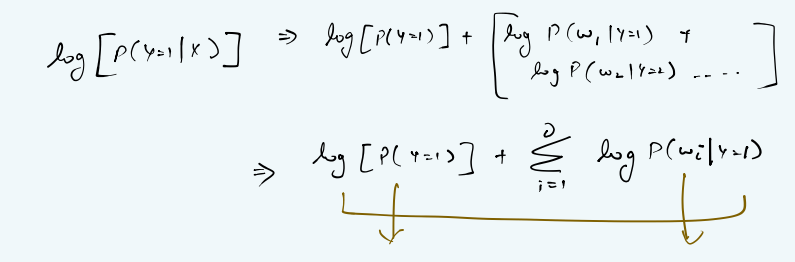    
     
     
     
     

# Naive Bayes | in sklearn 

https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.BernoulliNB.html

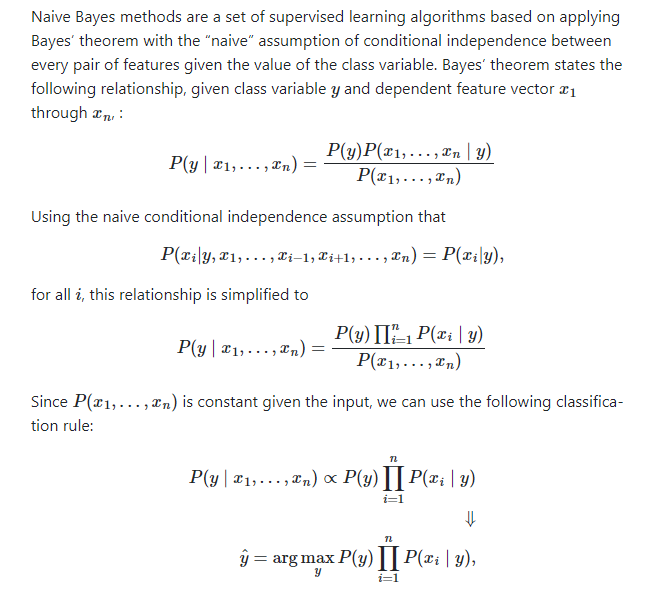
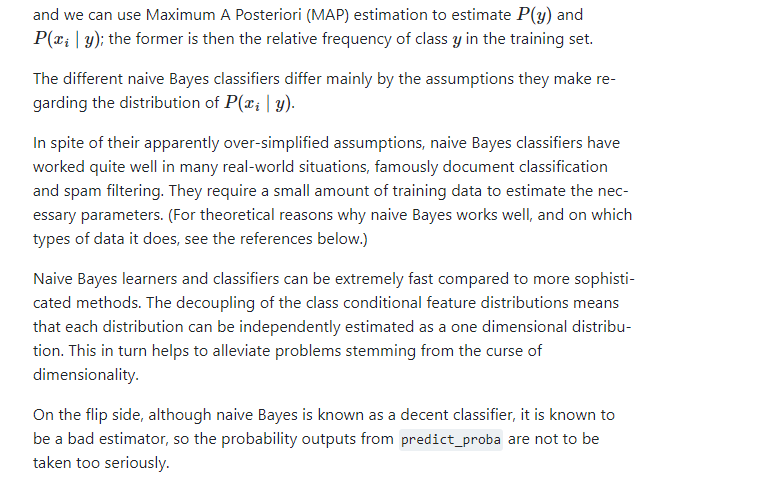

## MultinomialNB

    - in Multinomial NB , instead of taking 1 when word present in data and 0 when not present , 
         - we take frequency / occurances of word into account.
         How many times the word wj present in the text. 
         We are adding more information to model. 
         
             in BernouliNB 
             
             if X-query : I was good good ... good. 
             
            we find P["good" |y=1 ]
            in how many spam emails good is present.
            
            
                                            in MultinomailNB we find 
                                            
                                            P["good" = 3 | y= 1]
                                            In how many spam emails good is present 3 times. 
                                            
            

In [88]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import f1_score,accuracy_score

MNB = MultinomialNB(alpha=0.8)

MNB.fit(X_train,y_train)
y_pred = MNB.predict(X_test)
f1_score(y_test, y_pred),f1_score(y_train, MNB.predict(X_train))

(0.921832884097035, 0.9739910313901345)

    
    in Naive Bayes: 
    
    Classification : 
        
         y is discrete : 
         
         X : 
                 if features are categorical : 
                               only 2 unique values : BernauliNB
                               multiple values  : MultinomialNB
                               
                 if features are Numerical : 
                             Gaussian NB.   - which assumes the features are normally distributed
                             
                             if features are not Normally distributed , we have to transform data into normal distribution.
                             
                             
                             
    XQuery  => age=41.5 , 
               weight = 75.3
               
               
               P[ y=1 | age= 41.5 and weight = 75.3]
               P[ y=1 | <41.5,75.3>]              
                 
                  = P[age = 41.5 |y=1]  : likelyhood of age=41.5 when data y=1
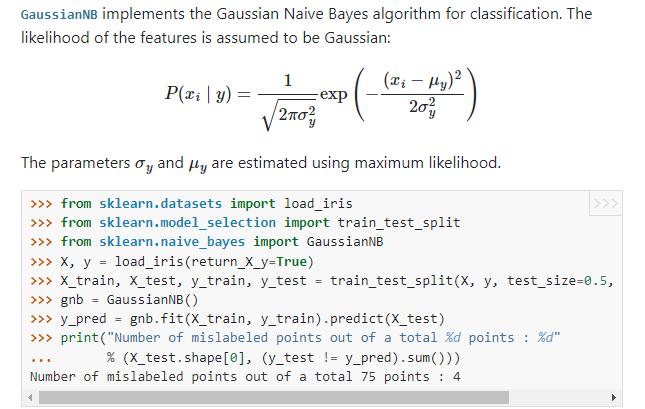
               
                 

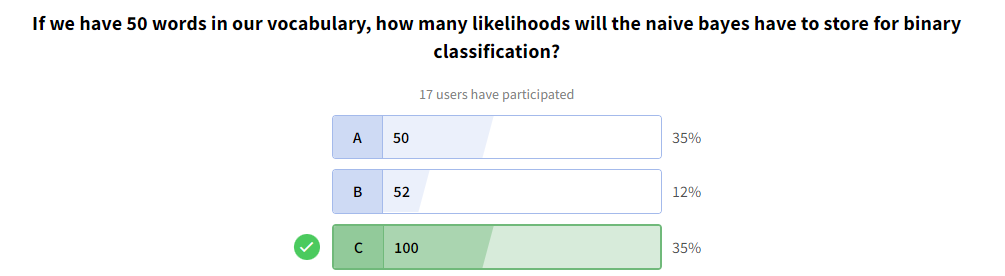

In [105]:

import warnings
warnings.filterwarnings('ignore')

In [106]:
X_train = [[1, 0, 1, 2, 0], [3, 0, 1, 3, 0], [0, 2, 1, 1, 3], [1, 2, 0, 0, 1], [0, 1, 1, 3, 0], [2, 0, 2, 3, 1], [3, 1, 2, 1, 3], [0, 0, 0, 1, 1], [0, 2, 1, 1, 3], [2, 2, 3, 1, 1], [3, 2, 3, 1, 1], [0, 2, 1, 2, 0], [0, 0, 0, 0, 2], [1, 0, 0, 0, 2], [3, 2, 1, 2, 2], [2, 3, 0, 0, 1], [2, 3, 3, 1, 3], [0, 1, 2, 0, 1], [1, 2, 0, 1, 3], [1, 3, 1, 2, 0], [1, 3, 2, 2, 0], [3, 0, 0, 1, 2], [3, 2, 1, 2, 0], [1, 3, 1, 2, 0], [3, 3, 2, 3, 1], [3, 0, 2, 1, 3], [0, 3, 1, 0, 0], [1, 0, 0, 0, 3], [0, 2, 0, 1, 0], [2, 1, 3, 1, 3], [3, 2, 1, 1, 1], [1, 0, 1, 1, 1], [3, 0, 0, 2, 3], [2, 2, 2, 1, 0], [3, 3, 2, 2, 1], [1, 2, 2, 3, 0], [0, 3, 1, 2, 0], [3, 1, 1, 3, 3], [1, 3, 2, 2, 0], [2, 3, 3, 3, 0], [2, 3, 2, 1, 3], [2, 0, 1, 2, 1], [0, 1, 2, 3, 2], [3, 1, 2, 0, 2], [2, 2, 3, 0, 1], [2, 1, 0, 3, 0], [0, 1, 1, 0, 0], [2, 3, 2, 2, 2], [3, 2, 1, 2, 3], [3, 2, 0, 0, 0]]
y_train = [0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0]

X_test = [[0, 2, 1, 1, 1], [2, 1, 1, 0, 0], [2, 0, 2, 2, 2], [2, 0, 3, 1, 0], [3, 3, 1, 2, 1], [3, 0, 1, 0, 2], [0, 3, 3, 3, 1], [3, 3, 0, 3, 2], [0, 3, 2, 2, 3], [2, 3, 3, 0, 0]]
y_test = [0, 1, 1, 0, 0, 1, 0, 1, 0, 0]

alphas = [0.1, 1, 100, 1000]

In [107]:
X_train = np.array(X_train)
X_test = np.array(X_test)
y_train = np.array(y_train).reshape(-1,1)
y_test = np.array(y_test).reshape(-1,1)

#Import Multinomial naive bayes from the appropraite library
from sklearn.naive_bayes import MultinomialNB

# Import accuracy_score from the appropraite library
from sklearn.metrics import accuracy_score

# Define train_and_predict()
def train_and_predict(a):
    
    
    
    # Instantiate the classifier: nb_classifier, and plug in alpha's value
    nb_classifier = MultinomialNB(alpha=a)

    # Fit to the training data
    nb_classifier.fit(X_train,y_train)
    
    # Predict the labels: pred
    y_pred = nb_classifier.predict(X_test)
    
    # Compute accuracy: score
    score =   accuracy_score(y_test,y_pred)  

    return score


# Iterate over the alphas and print the corresponding score
for i in alphas:
    print('Alpha: ', i)
    print('Score: ', train_and_predict(i))
    print()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Alpha:  0.1
Score:  0.9

Alpha:  1
Score:  0.9

Alpha:  100
Score:  0.9

Alpha:  1000
Score:  0.6

